In [191]:
import numpy as np
h = 0.01
sigma = 19
b = 2
r = 30
x_0 = np.array([1,2,3], float)
n = 20000
N = int(np.ceil(1 + 3.322*np.log10(n)))

In [192]:
def lorenz(n : int, x_0 , h : float, sigma : float, b : float, r : float):
    x_1, x_2, x_3 = x_0
    for _ in range(n):
        yield from (x_1, x_2, x_3)
        x_1, x_2, x_3 = x_1 + sigma*h*(x_2-x_1), x_2 + h * (x_1*(r-x_3)-x_2), x_3 + h * (x_1*x_2-b*x_3)

In [193]:
space = np.linspace(1, n, n)
x = np.fromiter(lorenz(n, x_0, h, sigma, b, r), float)
x = np.reshape(x, (n, 3))
x.shape

(20000, 3)

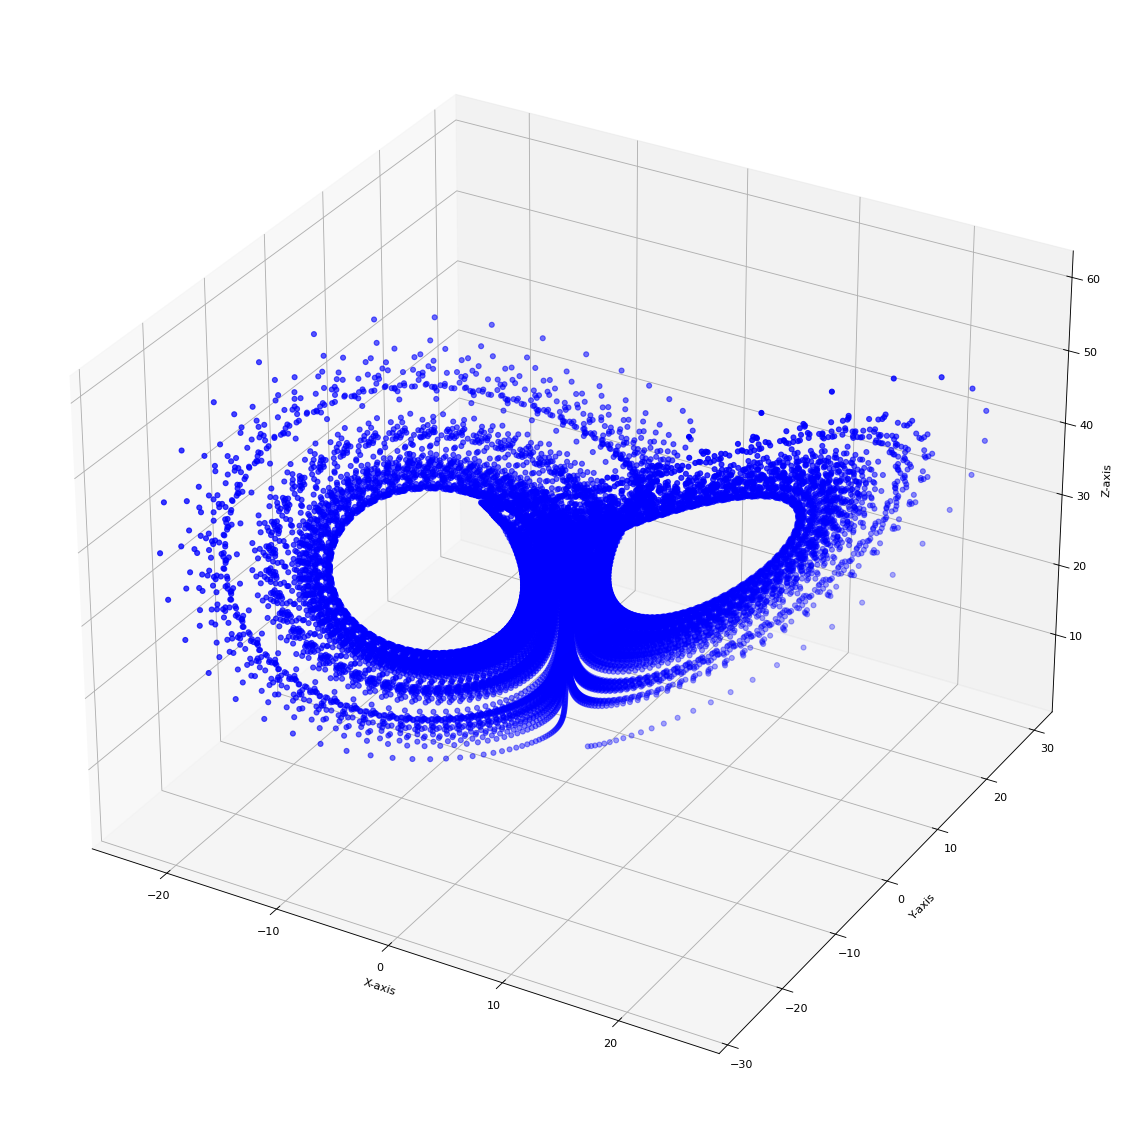

In [214]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 36), dpi=80)
ax = plt.subplot(111,projection='3d')
ax.scatter(*x.T, marker='o', c = 'b')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [338]:
avg = np.average(x, axis = 0)
avg_sq = np.average(x**2, axis = 0)
avg_12 = np.average(x[:,0]*x[:,1])
avg_13 = np.average(x[:,0]*x[:,2])

print(2*(avg_sq[0]-avg_12)/(avg_sq[0] + avg_sq[1] - 2*avg_12))
print((avg[1] + avg_13)/avg[0])
print(avg_12 / avg[2])

0.18163331498078192
31.481607749735698
2.005990937573708


In [181]:
def calc_params():
    sp = space.reshape(n, 1)
    x_a = np.cumsum(x, axis=0) / sp
    x_a_sq = np.cumsum(x ** 2, axis=0) / sp
    x_a_12 = np.cumsum(x[:, 0] * x[:, 1]) / space
    x_a_13 = np.cumsum(x[:, 0] * x[:, 2]) / space

    D = 1 / 48
    E_ps = np.random.normal(0, np.sqrt(D), 3 * n).reshape(n, 3)
    c1, c2, c3 = np.var(E_ps, axis=0)
    y = x + E_ps
    y_a = np.cumsum(y, axis=0) / sp
    y_a_sq = np.cumsum(y ** 2, axis=0) / sp
    y_a_12 = np.cumsum(y[:, 0] * y[:, 1]) / space
    y_a_13 = np.cumsum(y[:, 0] * y[:, 2]) / space

    sigmah = 2 * (x_a_sq[:, 0] - x_a_12) / (x_a_sq[:, 0] + x_a_sq[:, 1] - 2 * x_a_12)
    R = (x_a[:, 1] + x_a_13) / x_a[:, 0]
    B = x_a_12 / x_a[:, 2]

    sigmah_y = 2 * (y_a_sq[:, 0] - c1 - y_a_12) / (y_a_sq[:, 0] - c1 + y_a_sq[:, 1] - c2 - 2 * y_a_12)
    R_y = (y_a[:, 1] - c2 + y_a_13) / y_a[:, 0]
    B_y = y_a_12 / y_a[:, 2]

    return sigmah, R, B, sigmah_y, R_y, B_y, E_ps

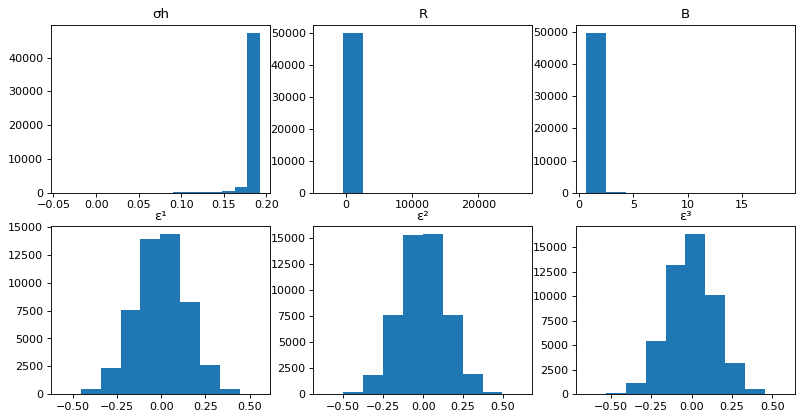

In [182]:
#bins = [2.89963,2.94201,2.98438,3.02676,3.06914,3.11151]
rng_s = np.linspace(1.74, 1.95, N)
rng_r = np.linspace(2.85, 3.05, N)
rng_b = np.linspace(1.96, 2.05, N)
sigmah, R, B, sigmah_y, R_y, B_y, E = calc_params()
#A_n, A_yn, B_n, B_yn = calc_params()
offset = max(n//100, 100)
bins = np.linspace(min(sigmah_y[offset:]),max(sigmah_y[offset:]),N)
plt.figure(figsize=(12, 6), dpi=80)
ax = plt.subplot(2,3,1)
plt.title('σh')
sq = ax.hist(sigmah_y, bins = bins)
bins = np.linspace(min(R_y[offset:]),max(R_y[offset:]),N)
ax = plt.subplot(2,3,2)
plt.title('R')
sq = ax.hist(R_y)
bins = np.linspace(min(B_y[offset:]),max(B_y[offset:]),N)
ax = plt.subplot(2,3,3)
plt.title('B')
sq = ax.hist(B_y)

ax = plt.subplot(2,3,4)
plt.title('ε¹')
sq = ax.hist(E[:,0])

ax = plt.subplot(2,3,5)
plt.title('ε²')
sq = ax.hist(E[:,1])

ax = plt.subplot(2,3,6)
plt.title('ε³')
sq = ax.hist(E[:,2])
plt.show()